In [19]:
from sklearn.model_selection import train_test_split

In [20]:
import pandas as pd

In [21]:
df = pd.read_csv("Mumbai1.csv")

In [22]:
print(df.head())

   Unnamed: 0    Price  Area  Location  No. of Bedrooms  New/Resale  \
0           0  4850000   720  Kharghar                1           0   
1           1  4500000   600  Kharghar                1           0   
2           2  6700000   650  Kharghar                1           0   
3           3  4500000   650  Kharghar                1           0   
4           4  5000000   665  Kharghar                1           0   

   Gymnasium  Lift Available  Car Parking  Maintenance Staff  24x7 Security  \
0          0               1            1                  1              1   
1          1               1            1                  1              1   
2          1               1            1                  1              1   
3          0               1            1                  1              1   
4          0               1            1                  1              1   

   Children's Play Area  Clubhouse  Intercom  Landscaped Gardens  \
0                     0       

In [23]:
target=df['Price']

In [24]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6347 entries, 0 to 6346
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            6347 non-null   int64 
 1   Price                 6347 non-null   int64 
 2   Area                  6347 non-null   int64 
 3   Location              6347 non-null   object
 4   No. of Bedrooms       6347 non-null   int64 
 5   New/Resale            6347 non-null   int64 
 6   Gymnasium             6347 non-null   int64 
 7   Lift Available        6347 non-null   int64 
 8   Car Parking           6347 non-null   int64 
 9   Maintenance Staff     6347 non-null   int64 
 10  24x7 Security         6347 non-null   int64 
 11  Children's Play Area  6347 non-null   int64 
 12  Clubhouse             6347 non-null   int64 
 13  Intercom              6347 non-null   int64 
 14  Landscaped Gardens    6347 non-null   int64 
 15  Indoor Games          6347 non-null   

In [26]:
df.columns

Index(['Unnamed: 0', 'Price', 'Area', 'Location', 'No. of Bedrooms',
       'New/Resale', 'Gymnasium', 'Lift Available', 'Car Parking',
       'Maintenance Staff', '24x7 Security', 'Children's Play Area',
       'Clubhouse', 'Intercom', 'Landscaped Gardens', 'Indoor Games',
       'Gas Connection', 'Jogging Track', 'Swimming Pool'],
      dtype='object')

In [27]:
import matplotlib.pyplot as plt


In [29]:
df.drop(df.columns[0], axis=1, inplace=True)

In [30]:
print(df.head())

     Price  Area  Location  No. of Bedrooms  New/Resale  Gymnasium  \
0  4850000   720  Kharghar                1           0          0   
1  4500000   600  Kharghar                1           0          1   
2  6700000   650  Kharghar                1           0          1   
3  4500000   650  Kharghar                1           0          0   
4  5000000   665  Kharghar                1           0          0   

   Lift Available  Car Parking  Maintenance Staff  24x7 Security  \
0               1            1                  1              1   
1               1            1                  1              1   
2               1            1                  1              1   
3               1            1                  1              1   
4               1            1                  1              1   

   Children's Play Area  Clubhouse  Intercom  Landscaped Gardens  \
0                     0          0         0                   0   
1                     0          1

In [31]:
pip install category_encoders

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [32]:
import category_encoders as ce

In [33]:
# Assuming 'Price' is the target variable and the rest are features
X = df.drop('Price', axis=1)  # Features (independent variables)
y = df['Price']  # Target variable (dependent)

# Apply binary encoding to the 'Location' column
encoder = ce.BinaryEncoder(cols=['Location'])
X_encoded = encoder.fit_transform(X)

# Now X_encoded can be used for training the linear regression model

In [34]:
print(X_encoded)

      Area  Location_0  Location_1  Location_2  Location_3  Location_4  \
0      720           0           0           0           0           0   
1      600           0           0           0           0           0   
2      650           0           0           0           0           0   
3      650           0           0           0           0           0   
4      665           0           0           0           0           0   
...    ...         ...         ...         ...         ...         ...   
6342   700           0           1           0           0           1   
6343   900           0           0           0           1           1   
6344   900           0           0           0           1           1   
6345  1380           1           0           1           1           1   
6346   700           0           0           1           1           0   

      Location_5  Location_6  Location_7  Location_8  ...  Maintenance Staff  \
0              0           0   

In [35]:
print(y.head())

0    4850000
1    4500000
2    6700000
3    4500000
4    5000000
Name: Price, dtype: int64


In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [37]:
# Step 1: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [38]:
# Step 2: Feature Scaling
scaler_X = StandardScaler()
scaler_y = StandardScaler()

In [39]:
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

In [40]:
# Step 3: Model Training
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)


LinearRegression()

In [41]:
# Step 4: Model Evaluation
y_pred_scaled = model.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

In [42]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [43]:
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 189667009442023.34
R^2 Score: 0.39448578698308523


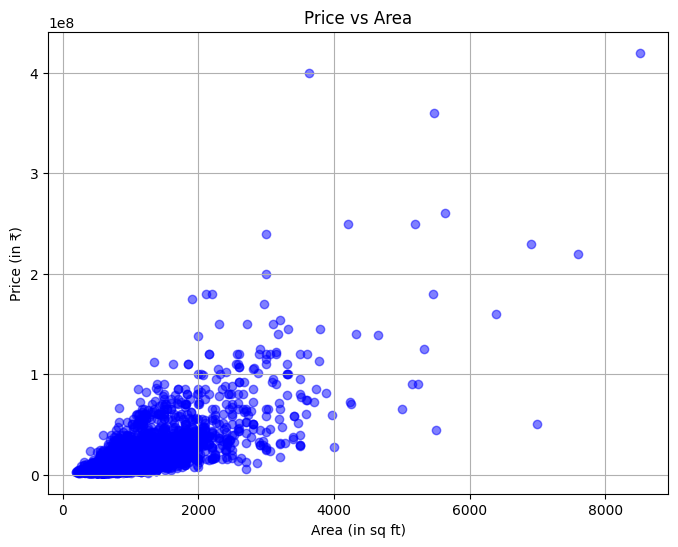

In [44]:
# Scatter plot: Price vs Area
plt.figure(figsize=(8, 6))
plt.scatter(df['Area'], df['Price'], alpha=0.5, color='blue')
plt.title('Price vs Area')
plt.xlabel('Area (in sq ft)')
plt.ylabel('Price (in ₹)')
plt.grid(True)
plt.show()

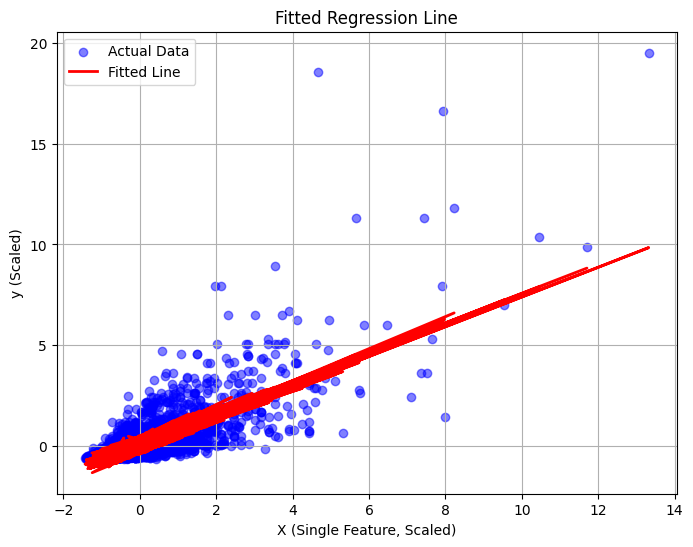

In [47]:
import matplotlib.pyplot as plt

# Select a single feature (e.g., the first feature) for X
X_train_single = X_test_scaled[:, 0]  # Shape: (5077,)

# Flatten y_train_scaled to a 1D array
y_train_flat = y_test_scaled.ravel()  # Shape: (5077,)

# Predict values using the trained model
y_pred = model.predict(X_train_scaled).ravel()

# Plot the scatter plot of the actual data
plt.figure(figsize=(8, 6))
plt.scatter(X_train_single, y_train_flat, color='blue', label='Actual Data', alpha=0.5)

# Plot the regression line
plt.plot(X_train_single, y_pred, color='red', label='Fitted Line', linewidth=2)

# Add title and labels
plt.title('Fitted Regression Line')
plt.xlabel('X (Single Feature, Scaled)')
plt.ylabel('y (Scaled)')
plt.legend()
plt.grid(True)
plt.show()


In [46]:
print(X_train_scaled.shape)
print(y_train_scaled.shape)


(5077, 25)
(5077, 1)


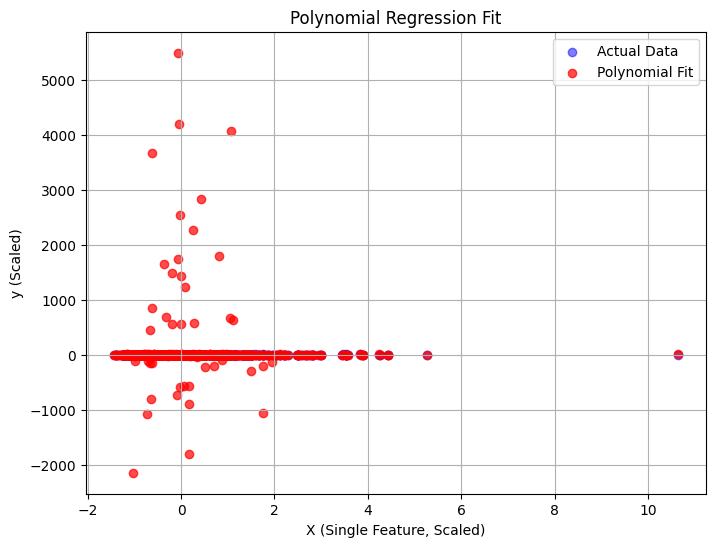

In [55]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Create polynomial features of degree 2 or 3
degree = 3  # Try different degrees
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Train the model
poly_model.fit(X_train_scaled, y_train_scaled)

# Predict values
y_pred_poly = poly_model.predict(X_test_scaled)

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(X_train_single, y_train_flat, color='blue', label='Actual Data', alpha=0.5)
plt.scatter(X_train_single, y_pred_poly, color='red', label='Polynomial Fit', alpha=0.7)
plt.title('Polynomial Regression Fit')
plt.xlabel('X (Single Feature, Scaled)')
plt.ylabel('y (Scaled)')
plt.legend()
plt.grid(True)
plt.show()


ValueError: x and y must be the same size

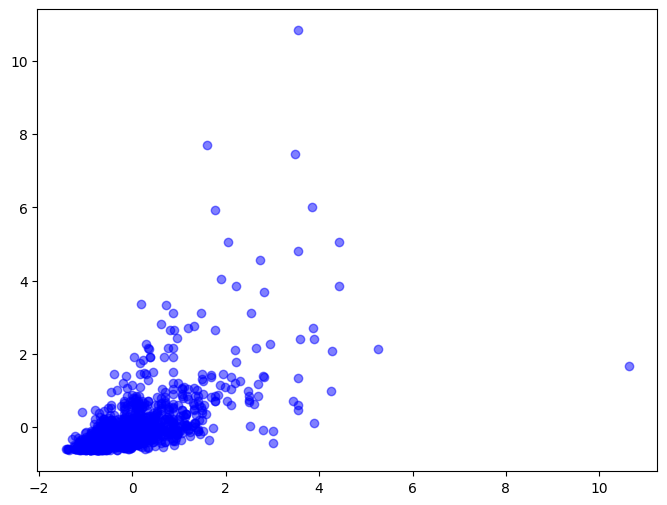

In [48]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Create polynomial features of degree 2 or 3
degree = 3  # Try different degrees
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Train the model
poly_model.fit(X_train_scaled, y_train_scaled)

# Predict values
y_pred_poly = poly_model.predict(X_train_scaled)

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(X_train_single, y_train_flat, color='blue', label='Actual Data', alpha=0.5)
plt.scatter(X_train_single, y_pred_poly, color='red', label='Polynomial Fit', alpha=0.7)
plt.title('Polynomial Regression Fit')
plt.xlabel('X (Single Feature, Scaled)')
plt.ylabel('y (Scaled)')
plt.legend()
plt.grid(True)
plt.show()


In [50]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Function to evaluate the model
def evaluate_model(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    print(f"R² Score: {r2:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    return r2, mse, mae

# For the linear regression model
y_pred_linear = model.predict(X_train_scaled)
print("Linear Regression Performance:")
evaluate_model(y_train_scaled, y_pred_linear)

# For Polynomial Regression
y_pred_poly = poly_model.predict(X_train_scaled)
print("\nPolynomial Regression Performance:")
evaluate_model(y_train_scaled, y_pred_poly)

Linear Regression Performance:
R² Score: 0.5805
Mean Squared Error (MSE): 0.4195
Mean Absolute Error (MAE): 0.3703

Polynomial Regression Performance:
R² Score: 0.9850
Mean Squared Error (MSE): 0.0150
Mean Absolute Error (MAE): 0.0777


(0.9849827158874376, 0.015017284112562392, 0.07769411522423011)